# Handwritten Digit Recognition with Convolutional Neural Networks

[AI Bridge](https://katedry.czu.cz/kii/aibridge) workshop - 28th February 2024

## Importing libraries and modules

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import requests

from io import BytesIO
from PIL import Image, ImageEnhance, ImageOps
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

## Training and testing a prediction model on the MNIST datset

### Loading and understanding the dimensions the MNIST dataset

The MNIST dataset is a classic in the field of machine learning, often used for benchmarking classification algorithms. It contains **70,000 images of handwritten digits, each 28x28 pixels** in size. The dataset is pre-divided into a training set and a testing set.

In [6]:
# Load the MNIST dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
# Print the shape of the entire training dataset (number of images, image width, image height)
print("Train dataset: ", train_images.shape)

# Print the type
print(type(train_images))

Train dataset:  (60000, 28, 28)
<class 'numpy.ndarray'>


In [9]:
# Print the shape of the entire test dataset (number of images, image width, image height)
print("Test dataset: ", test_images.shape)

Test dataset:  (10000, 28, 28)


In [19]:
# Print rows 12 to 14 of the first image in the training dataset (0 = black, 255 = white)
print("Three rows from the first image:")
print(train_images[0][12])
print(train_images[0][13])
print(train_images[0][14])

Three rows from the first image:
[  0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0  35 241 225 160 108   1
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
  25   0   0   0   0   0   0   0   0   0]


### Visualizing the MNIST Dataset

Visualizing the dataset is a crucial step in understanding the kind of data we're working with. This section of the code generates a grid of images from the MNIST dataset.

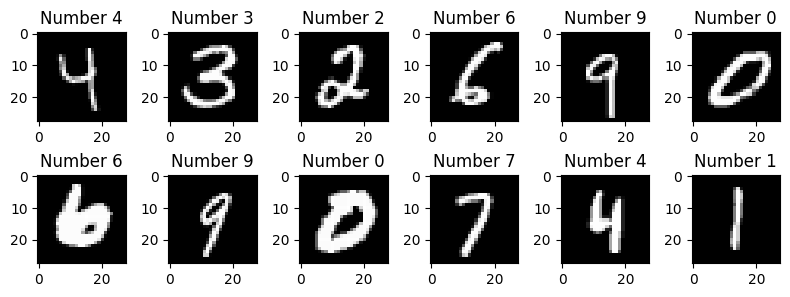

In [17]:
# Set the figure size for the plot (8x3 inch)
plt.rcParams["figure.figsize"] = (8, 3)

# Loop to display 12 random images from the training dataset
for i in range(12):

    # Create a subplot for each image (the i+1 parameter specified where the image will be displayed)
    plt.subplot(2, 6, i+1)

    # Randomly select an image
    num = random.randint(0, len(train_images))

    # Display the image in grayscale
    plt.imshow(train_images[num], cmap="gray", interpolation="none")

    # Add title (label) to each subplot (image)
    plt.title("Number {}".format(train_labels[num]))

# Adjusts the spacing between the subplots
plt.tight_layout()

### Preprocessing the image data

Before training a convolutional neural network (CNN), it's essential to preprocess the image data so that it's in a suitable format for the model. This involves two main steps: **reshaping the images** and **normalizing the pixel values**.

The MNIST dataset originally contains images with the shape (28, 28), representing the height and width in pixels. For a CNN, we need to **provide the depth of the input images**. Since MNIST images are grayscale, they have a depth of 1 (color images, like those in RGB format, have a depth of 3).

Pixel values in images are typically in the range of 0 to 255 (8-bit grayscale images). **Normalizing these pixel values to be between 0 and 1** helps the neural network learn more efficiently. This is because smaller values will make the learning process more stable and faster due to the way gradients are computed in backpropagation.

In [20]:
# Provide the depth
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [21]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

### Building the Convolutional Neural Network (CNN)

This model will be used to classify handwritten digits from the MNIST dataset.

It starts with a **convolutional layer of 32 filters**, followed by a **max pooling layer**, then **two more convolutional layers each with 64 filters** with another **max pooling layer** between them. These layers are designed to extract and downscale features from the images.

After flattening the output, the network has **two dense layers: the first with 64 neurons for further processing, and the final with 10 neurons using softmax activation** to classify the images into one of ten digit categories. This structure is typical for image classification, combining feature extraction with classification layers.



In [22]:
# Initialize a sequential model
model = models.Sequential()

# Add the first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))

# Add the first MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Add the second MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Flatten the output to feed into a Dense layer
model.add(layers.Flatten())

# Add a fully connected layer and the output layer
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

### Compiling the CNN model

Once the CNN model is defined, the next step is to compile it. Compiling the model involves specifying the optimizer, loss function, and metrics for evaluation.

The **optimizer** is responsible for updating the weights of the network during training.

The **loss function** measures how well the model is performing. A lower loss value indicates a better model. *Sparse categorical crossentropy* is used for classification tasks with multiple classes. It's particularly suitable when the classes are mutually exclusive, as is the case with digit classification.

**Metrics** are used to evaluate the performance of the model. *Accuracy* is the ratio of correctly classified images (digits) to the number of all images.

In [23]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Training the CNN model

After compiling the model, the next step is to train it using the MNIST dataset. This is accomplished with the `model.fit` method.

An **epoch** is one complete pass through the entire training dataset. Setting epochs=5 means the model will go through the training data five times, which helps the model learn better from the data.

**Batch size** parameter defines the number of samples that will be propagated through the network at one time. After each batch, the model updates its weights. It is a balance between efficiency and the quality of learning. A smaller batch size often leads to better training, but it's slower and requires more iterations.

In [24]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 45s 47ms/step - loss: 0.1765 - accuracy: 0.9465
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0487 - accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0276 - accuracy: 0.9910
Epoch 5/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0218 - accuracy: 0.9925


### Evaluating the model

After training the CNN, it's important to assess its performance on data it hasn't seen before, which in this case is the test set of the MNIST dataset.



In [26]:
# Test the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the accuracy as percentage
print(f"\nTest accuracy: {test_acc * 100}%")

313/313 [==============================] - 3s 8ms/step - loss: 0.0305 - accuracy: 0.9911

Test accuracy: 99.1100013256073%


## Predicting the class of an external image

Now we can test our final model on external images. In order to do this, we need to modify the input image into a format that our model accepts (28x28 and grayscale). Thus, the steps include image downloading, preprocessing, and classification.

### Downloading and loading an external image

At first, we fetch an image from the web and load it for further processing.

In [37]:
# Set URL of a PNG image
image_url = "https://raw.githubusercontent.com/pesout/digit-classifier/main/number_gallery/number4.png"

In [38]:
# Download the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

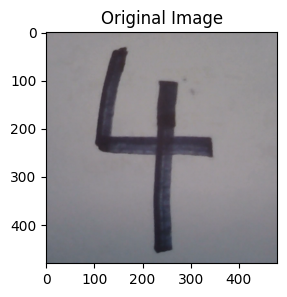

In [39]:
# Display the downloaded image
plt.imshow(img)
plt.title("Original Image")
plt.show()

### Image preprocessing (1): Color mode and inversion

We have to ensure that the image is in the RGB mode. PNG images can also be saved e.g. as RGBA (with alpha channel - transparency). If the image isn't in RGB, it is converted to this mode.

Then, the colors of the image are inverted. For example, black becomes white, and white becomes black. This is because our model has been trained on images where digits are white on a black background.


In [40]:
# Check the mode and convert if necessary
if img.mode != "RGB": img = img.convert("RGB")

In [41]:
# Invert the image colors
img = ImageOps.invert(img)

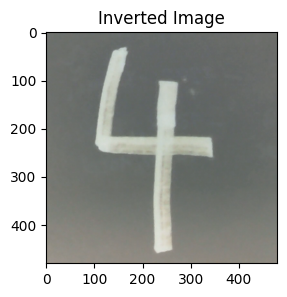

In [42]:
# Display the inverted image
plt.imshow(img)
plt.title("Inverted Image")
plt.show()

### Image preprocessing (2): Resizing, grayscale and contrast

The downloaded image needs to be processed to match the format and characteristics of the images on which the CNN was trained (MNIST dataset). The preprocessing steps include resizing, converting to grayscale, enhancing contrast, and normalizing.

In [43]:
# Resize to 28x28 pixels
img = img.resize((28, 28))

In [44]:
 # Convert to grayscale
img = img.convert("L")

The **contrast of the image is enhanced**, making it easier for the model to identify features. The enhancement factor can be adjusted. This is important because the "black" color in the photos is actually more of a darker grey and the "white" is a lighter grey.

In [45]:
contrast_enhancer = ImageEnhance.Contrast(img)

# Adjust the number to control the level of contrast
img = contrast_enhancer.enhance(4.0)

  The image is **converted into a NumPy** array to be compatible with the CNN input. **The pixel values are normalized** (divided by 255), as the CNN was trained on data where pixel values range from 0 to 1.

In [46]:
# Convert to numpy array
img_array = np.array(img)

# Normalize pixel values
img_array = img_array / 255.0

# Reshape for model input
img_array = img_array.reshape(1, 28, 28, 1)

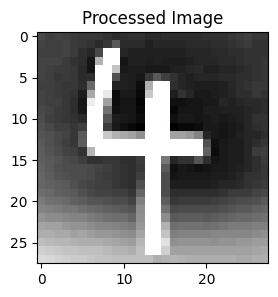

In [47]:
# Display the processed image (from NumPy array)
plt.imshow(img_array[0, :, :, 0], cmap="gray")
plt.title("Processed Image")
plt.show()

### Predicting the class

We use the trained CNN model to predict which digit the image represents.

In [48]:
# Get probabilities for each class
probabilities = model.predict(img_array)[0]

# Print all class probabilities (probability of each digit)
for i, prob in enumerate(probabilities):
    print(f"Class {i}: Probability {prob:.2%}")

1/1 [==============================] - 0s 135ms/step
Class 0: Probability 0.00%
Class 1: Probability 0.01%
Class 2: Probability 0.00%
Class 3: Probability 0.00%
Class 4: Probability 97.61%
Class 5: Probability 0.00%
Class 6: Probability 0.01%
Class 7: Probability 0.02%
Class 8: Probability 2.35%
Class 9: Probability 0.00%


 Identify the class with the highest probability, which is the model's prediction for the digit represented by the image.

In [49]:
print("Predicted Class:", np.argmax(probabilities))

Predicted Class: 4


## Export the model (optional)

This enables you to reuse the trained model somewhere else later, either for further evaluation, additional training, or making predictions on new data.

In [1]:
model.save("exported_model.h5") # You can also use the newer .keras format